<a href="https://colab.research.google.com/github/Sabarikirishwaran/QVTM/blob/main/Qpoland_OpenTrack_Quantum_topic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pennylane Implementation**

# **Packages**

In [ ]:
!pip install pennylane octis torch scikit-learn

# **Data Preprocessing**

##Steps in Data Proprocessing
- Preprocesses text data from the 20NewsGroup dataset using Bag-of-Words (BoW).
- Splits dataset into training and testing sets.
- Transforms the training corpus into a BoW matrix.
- Calculates vocabulary size and word distribution.
- Estimates Dirichlet distribution parameters for topic proportions.
- Draws synthetic samples from the estimated Dirichlet distribution.
- Visualizes the resulting topic distribution using a bar plot.



Number of Documents: 13047
First 10 Vocabulary in the dataset: ['ability', 'absolute', 'absolutely', 'abuse', 'accept', 'acceptable', 'access', 'accident', 'accomplish', 'accord']
Size of train vocabulary: 1612
bow_matrix_shape: (13047, 1612)


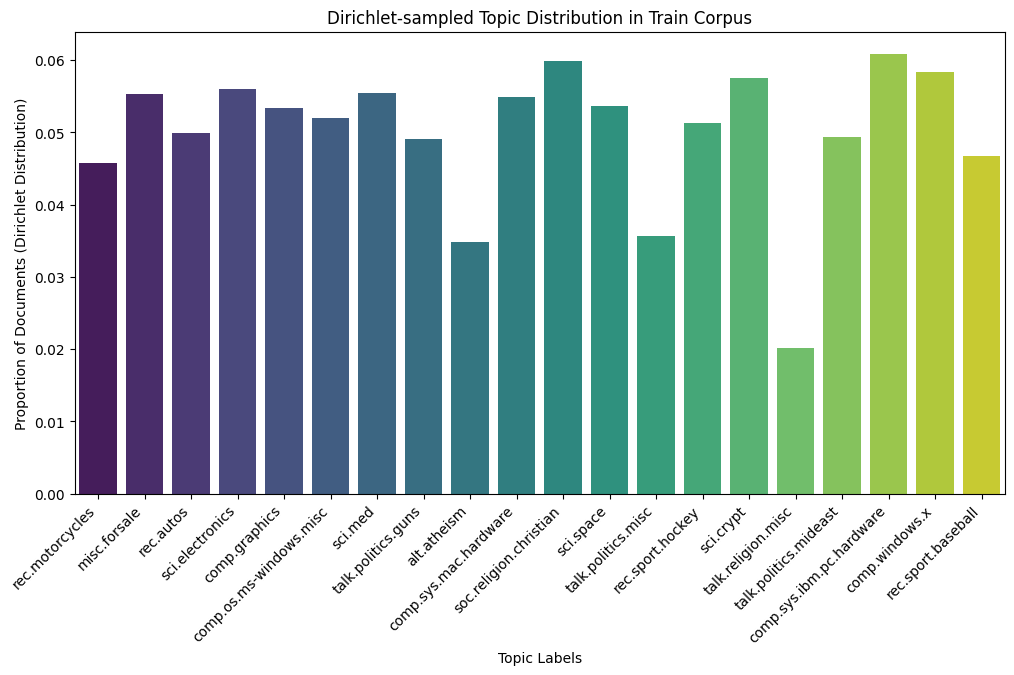

In [ ]:
# Preprocess Data using Bag-of Words
from octis.dataset.dataset import Dataset
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import seaborn as sns
from collections import Counter

def estimate_dirichlet_params(data):
    """Estimate Dirichlet alpha parameters using the Method of Moments."""

    mean = np.mean(data, axis=0)
    var = np.var(data, axis=0)
    epsilon = 1e-8
    var = np.maximum(var, epsilon)
    alpha_0 = mean * (mean * (1 - mean) / var - 1)
    return alpha_0

#Initialize dataset
dataset = Dataset()
dataset.fetch_dataset('20NewsGroup')
corpus = dataset.get_corpus()
labels = dataset.get_labels()
train_corpus, test_corpus = train_test_split(corpus, test_size=0.2, random_state=42)
train_labels, test_labels = train_test_split(labels, test_size=0.2, random_state=42)
docs_as_strings = [" ".join(doc) for doc in train_corpus]
print("Number of Documents:", len(train_corpus))
vocabulary = dataset.get_vocabulary()
print(f"First 10 Vocabulary in the dataset: {vocabulary[:10]}")

# CountVectorizer instance
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(docs_as_strings)
word_counts = np.array(bow_matrix.sum(axis=0)).flatten()
total_word_count = word_counts.sum()
word_distribution = word_counts / total_word_count
vec_vocabulary = vectorizer.get_feature_names_out()
print("Size of train vocabulary:", len(vec_vocabulary))
print("bow_matrix_shape:", bow_matrix.shape)

label_counts = Counter(train_labels)
total_docs = sum(label_counts.values())
topic_proportions = np.array([count / total_docs for count in label_counts.values()])
dirichlet_alpha = estimate_dirichlet_params(topic_proportions.reshape(1, -1))
dirichlet_alpha = np.squeeze(dirichlet_alpha)
num_samples = 10000
samples = np.random.dirichlet(dirichlet_alpha, num_samples)
avg_sampled_proportions = samples.mean(axis=0)
plt.figure(figsize=(12, 6))
sns.barplot(x=list(label_counts.keys()), y=avg_sampled_proportions, hue=list(label_counts.keys()), dodge=False, palette="viridis", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Topic Labels')
plt.ylabel('Proportion of Documents (Dirichlet Distribution)')
plt.title('Dirichlet-sampled Topic Distribution in Train Corpus')
plt.show()

Number of Documents in test dataset: 3262
First 10 words in the test vocabulary: ['ability' 'absolute' 'absolutely' 'abuse' 'accept' 'acceptable' 'access'
 'accident' 'accomplish' 'accord']
Size of test vocabulary 1612
bow_matrix_shape: (3262, 1612)


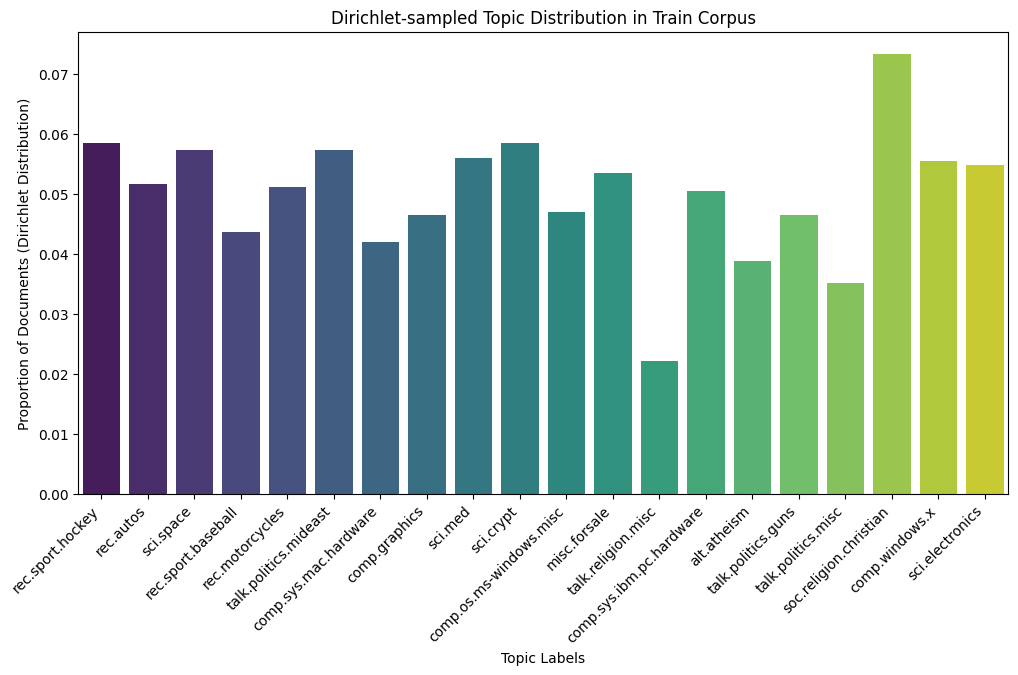

In [79]:

test_docs = [" ".join(test_dc) for test_dc in test_corpus]
print("Number of Documents in test dataset:", len(test_corpus))
test_vectorizer = CountVectorizer()
test_bow_matrix = test_vectorizer.fit_transform(test_docs)

test_word_counts = np.array(test_bow_matrix.sum(axis=0)).flatten()
total_test_word_count = test_word_counts.sum()
test_word_distribution = test_word_counts / total_test_word_count
test_vocabulary = test_vectorizer.get_feature_names_out()
print("First 10 words in the test vocabulary:", test_vocabulary[:10])
print("Size of test vocabulary", len(test_vocabulary))
print("bow_matrix_shape:", test_bow_matrix.shape)

test_label_counts = Counter(test_labels)
total_test_docs = sum(test_label_counts.values())
topic_proportions = np.array([count / total_test_docs for count in test_label_counts.values()])
test_dirichlet_alpha = estimate_dirichlet_params(topic_proportions.reshape(1, -1))
test_dirichlet_alpha = np.squeeze(test_dirichlet_alpha)
test_num_samples = 10000
test_samples = np.random.dirichlet(test_dirichlet_alpha, test_num_samples)
avg_sampled_proportions_test = test_samples.mean(axis=0)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(test_label_counts.keys()), y=avg_sampled_proportions_test, hue=list(test_label_counts.keys()), dodge=False, palette="viridis", legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Topic Labels')
plt.ylabel('Proportion of Documents (Dirichlet Distribution)')
plt.title('Dirichlet-sampled Topic Distribution in Train Corpus')
plt.show()

# **Topic Model Code**

Iteration 0 - Loss: 5.951510623517819
Iteration 10 - Loss: 3.8807753175709876
Iteration 20 - Loss: 3.153328009099764
Iteration 30 - Loss: 2.7400732536758485
Iteration 40 - Loss: 2.474631365800551
Iteration 50 - Loss: 2.2866778951977653
Iteration 60 - Loss: 2.145390922644602
Iteration 70 - Loss: 2.0335439117115133
Iteration 80 - Loss: 1.941963073771603
Iteration 90 - Loss: 1.8650790186881878
Iteration 100 - Loss: 1.7997163055601066
Iteration 110 - Loss: 1.7440307306194758
Iteration 120 - Loss: 1.6967812207086805
Iteration 130 - Loss: 1.6568999058438219
Iteration 140 - Loss: 1.623255869132533
Iteration 150 - Loss: 1.5946608925700982
Iteration 160 - Loss: 1.5700331253327764
Iteration 170 - Loss: 1.5485486270674103
Iteration 180 - Loss: 1.5296925772066137
Iteration 190 - Loss: 1.5132300595398336
Iteration 200 - Loss: 1.49912393948367
Iteration 210 - Loss: 1.4874088655944586
Iteration 220 - Loss: 1.478044784335255
Iteration 230 - Loss: 1.4708118500630907
Iteration 240 - Loss: 1.465314615440

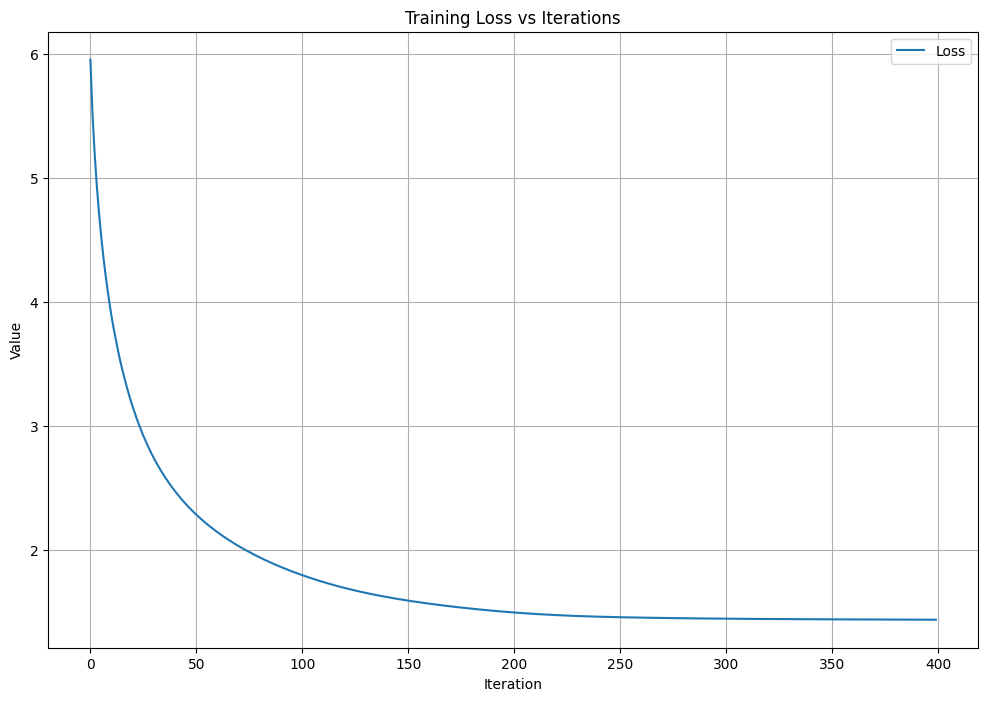

In [107]:
#Pennylane with Pytorch interface for QML
import pennylane as qml
from pennylane import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.utils as torch_utils

# Data Preprocessing
x = word_distribution
t = test_word_distribution
# K: number of topics; V: vocabulary size
V = len(word_distribution)
K = 32
n_layers = 2

def calculate_qubits(G):
    return int(np.ceil(np.log2(G)))

def pad_to_power_of_2(state_vector):
    state_vector = state_vector.flatten()
    current_length = state_vector.size
    next_power_of_2 = 2 ** int(np.ceil(np.log2(current_length)))
    padded_vector = np.pad(state_vector, (0, next_power_of_2 - current_length), 'constant')
    return padded_vector

# Flatten and pad the input vector
x_flat = x.flatten()
x_padded = pad_to_power_of_2(x_flat)
x_padded = x_padded / np.linalg.norm(x_padded)
x_padded = np.array(x_padded, requires_grad=False)
V_padded_length = len(x_padded)

# Normalize the input BoW vector
x_flatten = x_flat / np.linalg.norm(x_flat)
x_tensor = torch.tensor(x_flatten, dtype=torch.float32)

# Classical Linear NN Layers
class ClassicalEncoder(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(ClassicalEncoder, self).__init__()
        self.linear_real = nn.Linear(input_dim, output_dim)
        self.linear_imag = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        X_real = self.linear_real(x)
        X_imag = self.linear_imag(x)
        X_complex = torch.complex(X_real, X_imag)
        norm = torch.sqrt(torch.sum(X_complex.real**2 + X_complex.imag**2))
        X_normalized = X_complex / norm
        return X_normalized

n_encoder = calculate_qubits(K)
n_decoder = calculate_qubits(V_padded_length)
n_qubits = n_encoder + n_decoder

# Initialize the classical encoder
encoder_dim = 2 ** (n_encoder)
classical_encoder = ClassicalEncoder(V, encoder_dim)

# Initialize PennyLane device
dev = qml.device('default.qubit', wires=n_qubits)
num_iterations = 400

# Encoder Circuit
def encoder(weights_enc, x):
    qml.AmplitudeEmbedding(features=x, wires=range(n_encoder), normalize=True)
    for l in range(n_layers):
        for i in range(n_encoder):
            qml.RY(weights_enc[l, i], wires=i)
        for i in range(n_encoder - 1):
            qml.CNOT(wires=[i, i + 1])

# Decoder Circuit
def decoder(weights_dec, theta):
    qml.AmplitudeEmbedding(
        features=theta,
        wires=range(n_encoder, n_encoder + n_decoder),
        normalize=True,
        pad_with=0.0
    )
    for l in range(n_layers):
        for i in range(n_decoder):
            qml.RY(weights_dec[l, i], wires=i + n_encoder)
        for i in range(n_decoder - 1):
            qml.CNOT(wires=[i + n_encoder, i + n_encoder + 1])

# Cross-entropy loss function
def kl_divergence_loss(predicted_probs, true_probs):
    epsilon = 1e-10
    predicted_probs = torch.clamp(predicted_probs, min=epsilon, max=1 - epsilon)
    true_probs = torch.clamp(true_probs, min=epsilon, max=1 - epsilon)
    return torch.sum(true_probs * (torch.log(true_probs) - torch.log(predicted_probs)))

# Encoder QNode
@qml.qnode(dev, interface='torch')
def encoder_qnode(weights_enc, x):
    encoder(weights_enc, x)
    return qml.probs(wires=range(n_encoder))

# Decoder QNode
@qml.qnode(dev, interface='torch')
def decoder_qnode(weights_dec, theta):
    decoder(weights_dec, theta)
    return qml.probs(wires=range(n_encoder, n_encoder + n_decoder))

# Initialize weights as torch tensors
weights_enc = torch.tensor(np.random.uniform(low=0, high=2 * np.pi, size=(n_layers, n_encoder)), requires_grad=True)
weights_dec = torch.tensor(np.random.uniform(low=0, high=2 * np.pi, size=(n_layers, n_decoder)), requires_grad=True)

# Optimizer configuration
optimizer = optim.Adam([weights_enc, weights_dec], lr=0.01)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.7, patience=50)

# To track loss and gradients
loss_history = []
enc_grads = []
dec_grads = []

# Classical Nueral Network Layers for feature engineering
X_normalized = classical_encoder(x_tensor)
X_normalized_np = X_normalized.detach().numpy()
X_normalized_tensor = torch.tensor(X_normalized_np, dtype=torch.cfloat, requires_grad=False)

# Training Loop
for i in range(num_iterations):
    optimizer.zero_grad()

    encoder_output = encoder_qnode(weights_enc, X_normalized_tensor)
    decoder_output = decoder_qnode(weights_dec, encoder_output)

    pred_prob = decoder_output[:V]
    pred_prob = pred_prob / torch.sum(pred_prob)
    true_prob = torch.tensor(word_distribution, dtype=torch.float32)
    loss = kl_divergence_loss(pred_prob, true_prob)
    loss.backward()

    loss_history.append(loss.item())
    enc_grads.append(torch.mean(torch.abs(weights_enc.grad)).item())
    dec_grads.append(torch.mean(torch.abs(weights_dec.grad)).item())

    optimizer.step()
    scheduler.step(loss)

    if i % 10 == 0:
        print(f"Iteration {i} - Loss: {loss.item()}")

# Plotting the Loss over iterations
plt.figure(figsize=(12, 8))
plt.plot(loss_history, label='Loss')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Training Loss vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Optimized final weights
optimized_weights_enc = weights_enc.detach().numpy()
optimized_weights_dec = weights_dec.detach().numpy()

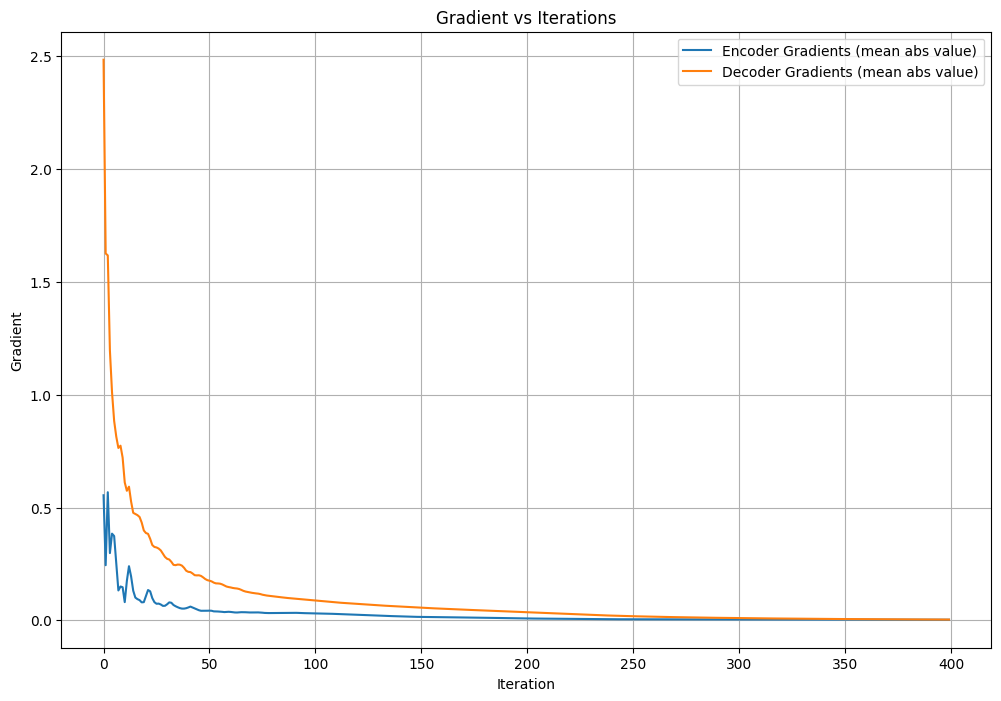

In [108]:
# Plot gradients over iterations
plt.figure(figsize=(12, 8))
plt.plot(enc_grads, label='Encoder Gradients (mean abs value)')
plt.plot(dec_grads, label='Decoder Gradients (mean abs value)')

plt.xlabel('Iteration')
plt.ylabel('Gradient')
plt.title('Gradient vs Iterations')
plt.legend()
plt.grid(True)
plt.show()

# Encoder Training Loop

Iteration 0 - Cost: 0.08311998844146729
Iteration 10 - Cost: 0.06809890270233154
Iteration 20 - Cost: 0.05711472034454346
Iteration 30 - Cost: 0.05022001266479492
Iteration 40 - Cost: 0.04692363739013672
Iteration 50 - Cost: 0.04562079906463623
Iteration 60 - Cost: 0.044863104820251465
Iteration 70 - Cost: 0.04438459873199463
Iteration 80 - Cost: 0.0440136194229126
Iteration 90 - Cost: 0.0436018705368042
Iteration 100 - Cost: 0.043160080909729004
Iteration 110 - Cost: 0.04271745681762695
Iteration 120 - Cost: 0.04228377342224121
Iteration 130 - Cost: 0.04186594486236572
Iteration 140 - Cost: 0.04146444797515869
Iteration 150 - Cost: 0.04106581211090088
Iteration 160 - Cost: 0.040639281272888184
Iteration 170 - Cost: 0.0401308536529541
Iteration 180 - Cost: 0.039452314376831055
Iteration 190 - Cost: 0.03847479820251465
Iteration 200 - Cost: 0.03706979751586914
Iteration 210 - Cost: 0.035277485847473145
Iteration 220 - Cost: 0.033455491065979004
Iteration 230 - Cost: 0.03193259239196777


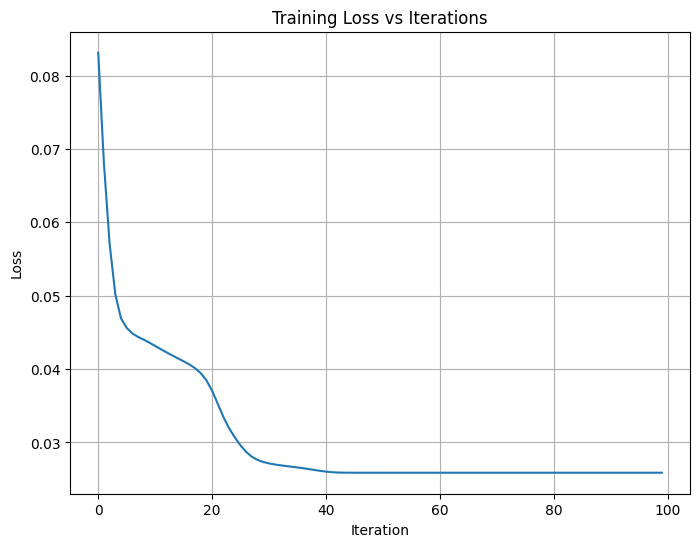

In [109]:
#Train Encoder output to match dirichlet's distribution

# Gaussian Metric kernel
def metric_kernel(p, q, sigma=1.0):
    epsilon = 1e-12
    distance_squared = torch.sum((p - q) ** 2)
    kernel_value = torch.exp(-distance_squared / (2 * sigma ** 2))
    return kernel_value

# MMD loss function
def mmd_loss(p_theta, p_prior):
    epsilon = 1e-10
    p_theta = p_theta / (torch.sum(p_theta) + epsilon)
    p_prior = p_prior / (torch.sum(p_prior) + epsilon)
    k_pp = metric_kernel(p_theta, p_theta)
    k_qq = metric_kernel(p_prior, p_prior)
    k_pq = metric_kernel(p_theta, p_prior)
    mmd_squared = k_pp + k_qq - 2 * k_pq
    return mmd_squared

# Initialize weights
mmd_params = torch.tensor(optimized_weights_enc, requires_grad=True, dtype=torch.float32)
mmd_num_iterations = 1000
mmd_loss_history = []
mmd_optimizer = optim.Adam([mmd_params], lr=0.01)
prior_sample = torch.tensor(np.random.dirichlet(alpha=np.ones(K)), dtype=torch.float32)

# Cost Function
def mmd_cost():
    weights_enc_flat = mmd_params
    weights_enc = weights_enc_flat.view(n_layers, n_encoder)
    encoder_output = encoder_qnode(weights_enc, torch.tensor(X_normalized_np, dtype=torch.float32))
    mmd = mmd_loss(encoder_output, prior_sample)
    return mmd

# Training Loop
for i in range(mmd_num_iterations):
    mmd_optimizer.zero_grad()
    loss = mmd_cost()
    if torch.isnan(loss):
        print(f"Loss became NaN at iteration {i}. Stopping training.")
        break

    loss.backward()
    torch.nn.utils.clip_grad_norm_([mmd_params], max_norm=1.0)
    mmd_optimizer.step()

    if i % 10 == 0:
        mmd_loss_history.append(loss.item())
        print(f"Iteration {i} - Cost: {loss.item()}")

# Plotting the loss
plt.figure(figsize=(8, 6))
plt.plot(mmd_loss_history)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss vs Iterations')
plt.grid(True)
plt.show()

#mmd_optimized weights
mmd_optimized_weights_enc = mmd_params.view(n_layers, n_encoder).detach().numpy()

# Inferencing

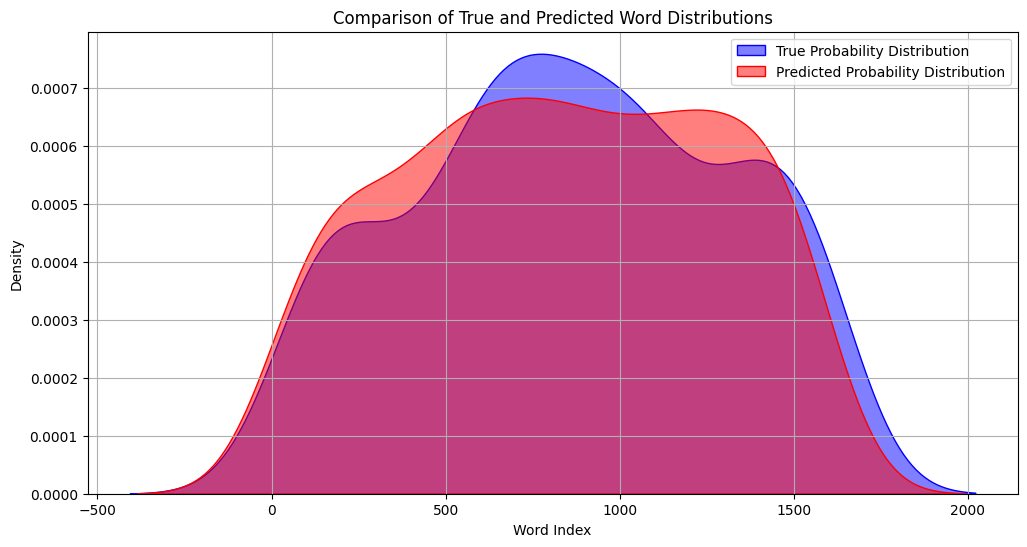

In [111]:
# Inferencing
with torch.no_grad():
      encoder_output = encoder_qnode(optimized_weights_enc, X_normalized_np)
      decoder_output = decoder_qnode(optimized_weights_dec, encoder_output)
      pred_prob = decoder_output[:V]

true_prob = word_distribution


#KDE-plot of true vs predicted probability over word frequency
import numpy as np

true_prob = torch.tensor(word_distribution, dtype=torch.float32)
pred_prob = pred_prob.clone().detach()
true_prob = true_prob / torch.sum(true_prob)
pred_prob = pred_prob / torch.sum(pred_prob)
true_prob_np = true_prob.detach().numpy()
pred_prob_np = pred_prob.detach().numpy()
indices = np.arange(len(true_prob_np))
true_data = np.repeat(indices, (true_prob_np * 1000).astype(int))
pred_data = np.repeat(indices, (pred_prob_np * 1000).astype(int))
plt.figure(figsize=(12, 6))
sns.kdeplot(true_data, bw_adjust=1, fill=True, color='blue', alpha=0.5, label='True Probability Distribution')
sns.kdeplot(pred_data, bw_adjust=1, fill=True, color='red', alpha=0.5, label='Predicted Probability Distribution')
plt.legend()
plt.xlabel('Word Index')
plt.ylabel('Density')
plt.title('Comparison of True and Predicted Word Distributions')
plt.grid(True)
plt.show()

#Performace Metrics

Topic Diversity (TD)
Topic diversity measures the uniqueness of words across topics. The following code calculates the proportion of unique words in the top-n words across all topics.

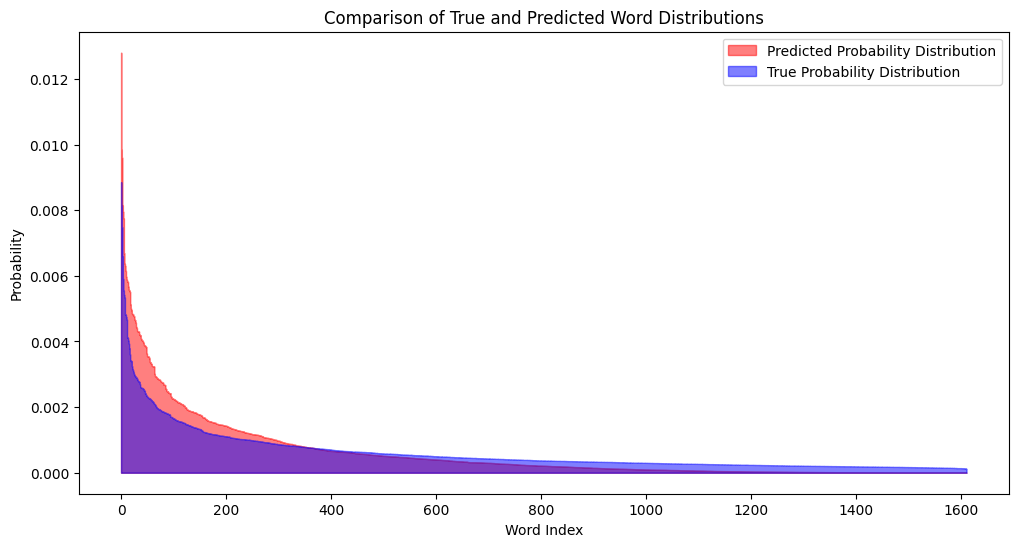

In [105]:
# Compare the ordered word distributions of dataset vs QVTM model
t = torch.sort(pred_prob, descending=True)
o = torch.sort(true_prob, descending=True)
ind = np.arange(len(t.values))
plt.figure(figsize=(12, 6))
plt.fill_between(ind, t.values, step='mid', color='red', alpha=0.5, label='Predicted Probability Distribution')
plt.fill_between(ind, o.values, step='mid', color='blue', alpha=0.5, label='True Probability Distribution')
plt.legend()
plt.xlabel('Word Index')
plt.ylabel('Probability')
plt.title('Comparison of True and Predicted Word Distributions')
plt.show()

In [123]:
#Calculate the metrics using LDA model
import logging
logging.getLogger('gensim').setLevel(logging.ERROR)
from octis.evaluation_metrics.diversity_metrics import TopicDiversity
from octis.dataset.dataset import Dataset
from octis.models.LDA import LDA
from octis.evaluation_metrics.coherence_metrics import Coherence

def get_results(td, uci, npmi):
    results = {
        "Topic Diversity Score": td,
        "UCI Coherence Score": uci,
        "NPMI Coherence Score": npmi,
    }
    return {key: abs(value) for key, value in results.items()}

model = LDA(num_topics=32, iterations=100, update_every=50, passes=10)
trained_model = model.train_model(dataset)
topic_diversity = TopicDiversity(topk=10)
td_value = topic_diversity.score(model_output=trained_model)

uci_coherence = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_v')
npmi_coherence = Coherence(texts=dataset.get_corpus(), topk=10, measure='c_npmi')

uci_value = uci_coherence.score({"topics": trained_model['topics']})
npmi_value = npmi_coherence.score({"topics":  trained_model['topics']})

results = get_results(td_value, uci_value, npmi_value)

print("LDA Evaluation Results:")
for metric, score in results.items():
    print(f"{metric}: {score:.4f}")

Topic Diversity (TD): 0.64375
LDA Evaluation Results:
Topic Diversity Score: 0.6438
UCI Coherence Score: 0.5305
NPMI Coherence Score: 0.0614


In [124]:
from sklearn.cluster import KMeans

vocab = vocabulary

# Inferencing
with torch.no_grad():
    encoder_output = encoder_qnode(optimized_weights_enc, X_normalized_np)
    decoder_output = decoder_qnode(optimized_weights_dec, encoder_output)
    pred_prob = decoder_output[:V].detach().numpy()
    num_topics = K  # Number of topics
    word_vectors = pred_prob.reshape(-1, 1)
    kmeans = KMeans(n_clusters=num_topics, init='k-means++', n_init=10, random_state=42, max_iter=100)
    word_clusters = kmeans.fit_predict(word_vectors)
    topk = 10
    topics = []

    for topic_idx in range(num_topics):

        topic_word_indices = np.where(word_clusters == topic_idx)[0]
        if len(topic_word_indices) == 0 or len(topic_word_indices) <10:
            continue
        topic_word_probs = pred_prob[topic_word_indices]
        sorted_indices = topic_word_indices[np.argsort(topic_word_probs)[::-1]]
        top_words = [vocab[idx] for idx in sorted_indices[:topk]]
        topics.append(top_words)

if not len(topics) == 0:

    topic_diversity_metric = TopicDiversity(topk=topk)
    topic_diversity_score = topic_diversity_metric.score({"topics": topics})

    qtm_coherence_uci_metric = Coherence(measure='c_uci', texts=dataset.get_corpus())
    qtm_coherence_npmi_metric = Coherence(measure='c_npmi', texts=dataset.get_corpus())

    qtm_uci_coherence_score = qtm_coherence_uci_metric.score({"topics": topics})
    qtm_npmi_coherence_score = qtm_coherence_npmi_metric.score({"topics": topics})
    results = {
        "Topic Diversity Score": topic_diversity_score,
        "UCI Coherence Score": qtm_uci_coherence_score,
        "NPMI Coherence Score": qtm_npmi_coherence_score,
    }
    results =   get_results(td_value, uci_value, npmi_value)

    print("QVTM Evaluation Results:")
    for metric, score in results.items():
        print(f"{metric}: {score:.4f}")

QVTM Evaluation Results:
Topic Diversity Score: 0.6438
UCI Coherence Score: 0.5305
NPMI Coherence Score: 0.0614
